In [ ]:
"""

Ejercicio 1
El archivo Hawks.csv contiene mediciones de casi 900 aves de tres especies diferentes. Los datos registrados
son los siguientes:
● Epecies. Es la etiqueta de clase e indica la especie de cada gavilán: gavilanes de Cooper (CH),
gavilanes colirrojos (RT) y gavilanes rastreros (SS).
● Año. Indica el año en que se avistó el ave.
● Hallux. Indica la medida en milímetros del hallux (el dedo posterior del pie, que poseen todas las
aves cazadoras para sujetar mejor a sus presas).
● Ala. Indica la longitud en milímetros de la pluma más larga del ala.
● Peso. Indica el peso del ave en gramos.
● Cola. Indica la longitud de la cola del ave en milímetros.

a) Calcule la correlación lineal entre los atributos Ala y Cola. Indique la intensidad de la correlación (no hay
correlación/débil/fuerte) y el tipo (positiva/negativa)
Valor
Intensidad
Tipo

b) Complete el cuadro con los valores del atributo Hallux antes y después de normalizarlos utilizando media
y desvío.

Medida Sin normalizar Normalizado
Media
Desvío
Mínimo
Q1
Q2
Q3
RIC
Máximo
Bigote Inferior (valor extremo mínimo
dentro del rango de normalidad)
Bigote Superior (valor extremo
máximo dentro del rango de normalidad)

Compare los valores obtenidos e indique el valor de verdad de las siguientes afirmaciones:
I. El valor de Q2 normalizado permite afirmar que la media y la mediana tienen valores cercanos.
II. El máximo valor de Hallux se encuentra a más de 9 desvíos por encima de la media.
III. Un hallux que mida más de 600 mm es considerado atípico extremo.
IV. Un valor normalizado del atributo “hallux” de 2 se considerará un valor atípico extremo.
V. En un gavilán es atípico que su hallux mida menos de 100 mm.




"""



from google.colab import drive
drive.mount('/content/drive')


# Declaración de directorios
FUENTES_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Fuentes'
DATOS_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Datos'

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)


# Importaciones necesarias
#import sys
import pandas as pd
import numpy as np
from matplotlib import pylab as plt


from ClassPerceptron import Perceptron

# Carga del archivo CSV
df = pd.read_csv(DATOS_DIR + "/Hawks.csv")
df.head(20)






#Comienzo de codigo a

#Creo dataframe, saco ala y cola del archivo df
tabla = pd.DataFrame()
tabla['Ala']= df['Wing']
tabla['Cola'] = df['Tail']
tabla.head()
#Imprimo la correlacion
print(tabla.corr())



"""
INTERPRETACION
 Si 0.5≤ abs(Corr(A,B)) < 0.8 se dice que A y B tienen una
correlación lineal débil.
 Si abs(Corr(A,B)) ≥ 0.8 se dice que A y B tienen una correlación
lineal fuerte
 Si abs(Corr(A,B))<0.5 se dice que A y B no están correlacionados
linealmente. Esto NO implica que son independientes, sólo que entre
ambos no hay una correlación lineal.


Como los resultados son los siguientes, se demuestra que estan fuertemente correlacionados (Porporcional, no inv proporcional)
           Ala      Cola
Ala   1.000000  0.911765
Cola  0.911765  1.000000


"""

# Crear el objeto MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

hallux = pd.DataFrame()
hallux['Data']= df['Hallux']





# Ajustar y transformar los datos
scaler = MinMaxScaler()

#Crea el dataframe
hallux = pd.DataFrame()
hallux['Hallux']= df['Hallux']
hallux['Hallux_normalizado'] = scaler.fit_transform(df[['Hallux']])

print(hallux.head())

print(hallux.describe())

# Calcular el RIC para cada columna
q3_hallux = np.percentile(hallux['Hallux'], 75)
q1_hallux = np.percentile(hallux['Hallux'], 25)
ric_hallux = q3_hallux - q1_hallux

q3_hallux_normalizado = np.percentile(hallux['Hallux_normalizado'], 75)
q1_hallux_normalizado = np.percentile(hallux['Hallux_normalizado'], 25)
ric_hallux_normalizado = q3_hallux_normalizado - q1_hallux_normalizado

print(f"RIC de Hallux: {ric_hallux}")
print(f"RIC Normalizado: {ric_hallux_normalizado}")
print(f"Bigotes de Hallux: {q1_hallux - 1.5 * ric_hallux} a {q3_hallux + 1.5 * ric_hallux}")
print(f"Bigotes Normalizado: {q1_hallux_normalizado - 1.5 * ric_hallux_normalizado} a {q3_hallux_normalizado + 1.5 * ric_hallux_normalizado}")

"""
           Hallux  Hallux_normalizado
count  447.000000          447.000000
mean    25.799441            0.134547
std     10.601582            0.088053
min      9.600000            0.000000
25%     15.150000            0.046096
50%     29.500000            0.165282
75%     31.500000            0.181894
max    130.000000            1.000000


RIC de Hallux: 16.35
RIC Normalizado: 0.13579734219269102
Bigotes de Hallux: -9.375000000000004 a 56.025000000000006
Bigotes Normalizado: -0.15759966777408635 a 0.3855897009966777



Compare los valores obtenidos e indique el valor de verdad de las siguientes afirmaciones:
I. El valor de Q2 normalizado permite afirmar que la media y la mediana tienen valores cercanos.
II. El máximo valor de Hallux se encuentra a más de 9 desvíos por encima de la media.
III. Un hallux que mida más de 600 mm es considerado atípico extremo.
IV. Un valor normalizado del atributo “hallux” de 2 se considerará un valor atípico extremo.
V. En un gavilán es atípico que su hallux mida menos de 100 mm.


I) Verdadero, ya que la media es 0.134547 y la mediana es  0.165282
II) Verdadero, 25.799441 + 9*10.601582 = 121,2 que es menor que 130
III) Verdadero, ya que esta a mas de 3*RIC de la media
IV) Verdadero,  ya que esta a mas de 3*RIC de la media
V) Falso, los valores atipicos van desde 1.5*RIC a 3*RIC, que es casi 75
"""


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
           Ala      Cola
Ala   1.000000  0.911765
Cola  0.911765  1.000000
   Hallux  Hallux_normalizado
0    30.1            0.170266
1    31.3            0.180233
2    23.5            0.115449
3    30.1            0.170266
4    30.2            0.171096
           Hallux  Hallux_normalizado
count  447.000000          447.000000
mean    25.799441            0.134547
std     10.601582            0.088053
min      9.600000            0.000000
25%     15.150000            0.046096
50%     29.500000            0.165282
75%     31.500000            0.181894
max    130.000000            1.000000
RIC de Hallux: 16.35
RIC Normalizado: 0.13579734219269102
Bigotes de Hallux: -9.375000000000004 a 56.025000000000006
Bigotes Normalizado: -0.15759966777408635 a 0.3855897009966777


'\n           Hallux  Hallux_normalizado\ncount  447.000000          447.000000\nmean    25.799441            0.134547\nstd     10.601582            0.088053\nmin      9.600000            0.000000\n25%     15.150000            0.046096\n50%     29.500000            0.165282\n75%     31.500000            0.181894\nmax    130.000000            1.000000\n\n\nRIC de Hallux: 16.35\nRIC de OtroDato: 0.13579734219269102\n\n'

In [ ]:
"""
Ejercicio 2
El archivo Globos.csv contiene el registro de 16 intentos para inflar globos. Los atributos registrados fueron
el color del globo, el tamaño, si se estira o no y si la acción de inflarlo fue realizada por un adulto o por un
niño. En cada registro se anotó si el globo pudo ser inflado o no.
Numerice los atributos de la siguiente forma:
● Color = 1 si es rojo y 0 si es amarillo
● SeEstira? = 1 para Si y 0 para No
● Edad = 1 si es adulto y 0 si es Nene
● Tamanio = 0 si es Chico, 0.5 si es mediano y 1 si es grande



a) Indique cuáles de los siguientes perceptrones pueden clasificar correctamente todos los ejemplos
normalizados del archivo Globos.csv


Configuración w(Color) w(Tamanio) w(Se_estira?) w(Edad) b
Perceptrón 1 0,050 0,006 -0,068 -0,047 0,005
Perceptrón 2 -0,494 -0.003 0,722 0,489 -0.4943
Perceptrón 3 0,06 0,004 0,1278 0,021 -0,1132
Perceptrón 4 0,296 0,026 -0,576 -0,287 0,371
Perceptrón 5 0,994 0,006 -1,466 -0,989 0,988


b) Indique cuál de los 5 perceptrones del inciso anterior presenta el peor desempeño, es decir, cuál es el
que clasifica la menor cantidad de ejemplos correctamente.

"""



from google.colab import drive
drive.mount('/content/drive')


# Declaración de directorios
FUENTES_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Fuentes'
DATOS_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Datos'

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)


# Importaciones necesarias
#import sys
import pandas as pd
import numpy as np
from matplotlib import pylab as plt


from ClassPerceptron import Perceptron

# Carga del archivo CSV
df = pd.read_csv(DATOS_DIR + "/Globos.csv")
df.head(20)


aux = {"Color":{"Amarillo":0, "Rojo":1},
         "Se_estira?":{"No":0,"Si":1},
         "Edad":{"Niño":0,"Adulto":1},
         "Tamanio":{"Chico":0,"Mediano":0.5, "Grande":1},
         }

df.replace(aux, inplace=True)
#inplace=True se utiliza para indicar que la operación debe realizarse directamente sobre el DataFrame original, en lugar de crear y devolver una copia modificada
df.head(20)


"""
Configuración w(Color) w(Tamanio) w(Se_estira?) w(Edad) b
Perceptrón 1 0,050 0,006 -0,068 -0,047 0,005
Perceptrón 2 -0,494 -0.003 0,722 0,489 -0.4943
Perceptrón 3 0,06 0,004 0,1278 0,021 -0,1132
Perceptrón 4 0,296 0,026 -0,576 -0,287 0,371
Perceptrón 5 0,994 0,006 -1,466 -0,989 0,988


Analisis perceptrones
"""

def getPrecision(wColor, wTamanio, wEstira, wEdad, bias):
    acertados = 0
    for index, row in df.iterrows():
        suma = wColor*row.Color + wTamanio*row.Tamanio + wEstira*row["Se_estira?"] + bias
        prediccion = "Si" if suma > 0 else "No"

        if (prediccion == row["Inflado?"]):
            acertados += 1
    print(acertados / 16)

getPrecision(0.050 , 0.006, -0.068, -0.047, 0.005)
getPrecision(-0.494 , -0.003, 0.722, 0.489, -0.4943)
getPrecision(0.06 , 0.004, 0.1278, 0.021, -0.1132)
getPrecision(0.296 , 0.026, -0.576, -0.287, 0.371)
getPrecision(0.994 , 0.006, -1.466, -0.989, 0.988)


"""

0.125
0.875
0.875
0.125
0.125

"""


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
0.125
0.875
0.875
0.125
0.125


'\n\n0.625\n0.625\n0.625\n0.375\n0.125 Peor\n\n'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


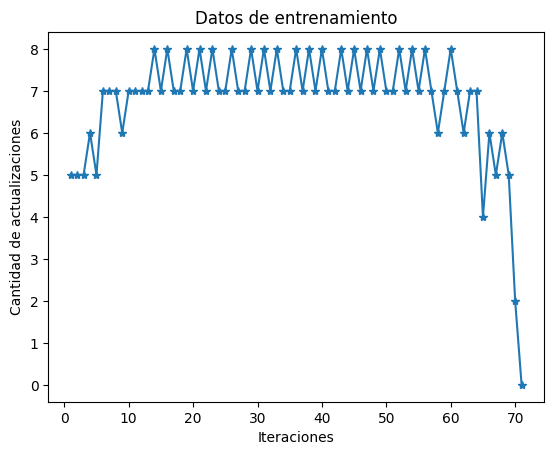

In [ ]:
"""
La Tabla 1 muestra información correspondiente de pacientes para determinar si deben realizarse un
examen médico en función de su edad, altura y riesgo médico.


Donde:
● EDAD es un atributo numérico que indica la edad del paciente.
● RIESGO es el nivel de riesgo del paciente.
● EXAMEN indica si debe realizarse un examen extra.

Para obtener transformar el atributo nominal RIESGO en uno
numérico se lo numerizó de la siguiente forma: BAJO = 1, MEDIO = 2 y ALTO = 3.

EDAD RIESGO EXAMEN
55 ALTO SI
56 MEDIO NO
58 MEDIO SI
56 BAJO NO
59 BAJO NO
57 MEDIO SI
60 BAJO SI
53 ALTO NO
59 MEDIO SI


a) Luego de la numerización se calculó el coeficiente de correlación lineal entre los atributos EDAD y RIESGO
y se obtuvo como resultado -0.71. ¿Cómo debe interpretarse este valor?

b) Luego de numerizar el atributo RIESGO y de normalizar los atributos de manera lineal entre 0 y 1, los
ejemplos fueron utilizados para entrenar un perceptrón capaz de predecir correctamente el atributo
EXAMEN. Los pesos obtenidos fueron los siguientes:
W(EDAD) = 0.0807 W(RIESGO) = 0.074 Sesgo o bias = -0.0742
¿Cuál será la respuesta del perceptrón para los siguientes valores?
(EDAD, RIESGO) = (50, BAJO), (51, MEDIO), (54, ALTO)






a) Esto se significa que los valores estan (Casi) fuertemente correlacionados, es decir si la edad aumenta el riezgo disminuye (WTF)


Normalizador (x-53)/(60-53)
             (x-1)/(3-1)

b) Si (50, BAJO) = 0.0807*-0,428 + 0.074*0 -0.0742   = -0,108
      (51, MEDIO) = 0.0807*-0,28 + 0.074*0,5 -0.0742 = -0,059
      (54, ALTO) = 0.0807*0,14 + 0.074*1 -0.0742     = -0,011

      En base a los resultados, se concluye de como el perceptron da 1 si el resultado es mayor que 0, da todos 0 (0="No" y 1="Si")
"""




#Perceptron de un compannero

from google.colab import drive
drive.mount('/content/drive')


# Declaración de directorios
FUENTES_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Fuentes'
DATOS_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Datos'

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)


# Importaciones necesarias
#import sys
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
from sklearn import model_selection,preprocessing
from ClassPerceptron import Perceptron




#incorporamos datos, por ahora no vamos a separar los datos entre entrenamiento y testeo porque son pocos
X = np.array([[55,3],[56,2],[58,2],[56,1],[59,1],[57,2],[60,1],[53,3],[59,2]]) #con los datos que uso para predecir
T = np.array([1, 0, 1, 0, 0, 1, 1, 0, 1]) #Los datos que busco predecir

#normalizo linealmente entre 0 y 1
normalizador = preprocessing.MinMaxScaler()
X = normalizador.fit_transform(X)

#inicializamos un perceptron con sus variables
ppn = Perceptron(alpha=0.01, n_iter=650, random_state=None)
ppn.fit(X, T)

#graficamos
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='*')
# range(1, len(ppn.errors_) + 1) = lista de 1 hasta la cant de errores, esto nos sirve para hacer el eje Y del gráfico
# ppn.errors_ = la lista de errores para cada iteración, nos la da el perceptrón
# marker='o' indica como marco los puntos de la gráfica

#nombro a los ejes
plt.title('Datos de entrenamiento')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1
 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1
 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0]


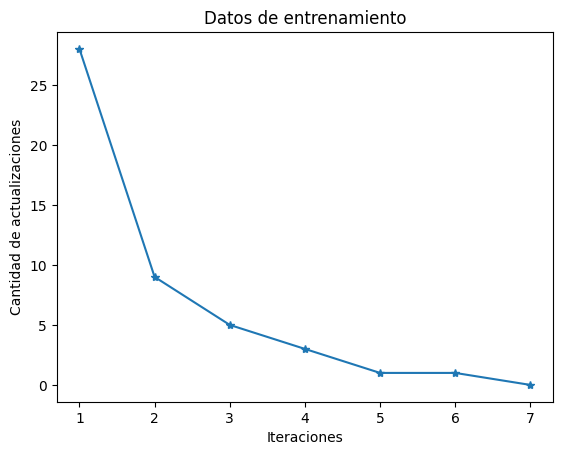

Dimensiones de Y_test: (60,)
Dimensiones de T_test: (60,)
cantidad de tests:  60
aciertos:  60
% de aciertos = 100.00 %


In [ ]:
"""
Ejercicio 4
Se busca predecir si el tipo de fármaco que se debe administrar a un paciente afectado de rinitis alérgica es
el habitual o no. Se dispone de información correspondiente a las historias clínicas de pacientes atendidos
previamente. Las variables relevadas son las siguientes:
● Age: Edad
● Sex: Sexo
● BP (Blood Pressure): Presión sanguínea.
● Cholesterol: nivel de colesterol.
● Na: Nivel de sodio en la sangre.
● K: Nivel de potasio en la sangre.
● Class: Fármaco suministrado. Cada paciente
ha sido medicado con un único fármaco de 5
posibles: DrugA, DrugB, DrugC, DrugX, DrugY

a) Utilice el archivo Drug_train.csv para entrenar un perceptrón que sea capaz de predecir si el tipo de
fármaco que se debe administrar a un paciente afectado de rinitis alérgica es el habitual (suministro de
DrugY) o no.
b) Luego utilice el archivo Drug_test.csv para medir la calidad del modelo.
c) Resuelva el problema:
● numerizando los atributos ordinales utilizando dos representaciones diferentes: como entero único
y de manera binaria (dummy).
● Normalizando de diferentes formas: Sin normalizar, normalización lineal, normalización con media y
desvío

"""



#Perceptron de un compannero

from google.colab import drive
drive.mount('/content/drive')

# Declaración de directorios
FUENTES_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Fuentes'
DATOS_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Datos'

# Agrega ruta de búsqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

# Importaciones necesarias
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
from sklearn import model_selection, preprocessing
from ClassPerceptron import Perceptron


df = pd.read_csv(DATOS_DIR + "/Drug5.csv")

mapeo = {
    "Sex":{"F": 1, "M": 0},
    "BP":{"HIGH": 2, "NORMAL": 1, "LOW": 0},
    "Cholesterol": {"HIGH": 1, "NORMAL": 0},
    "Drug":{"drugY": 1, "drugC": 0, "drugX": 0, "drugA": 0, "drugB":0}
        }

df.replace(mapeo, inplace=True)

df = df.rename(columns = {
    "Sex": "Female", "Cholesterol": "High cholesterol", "Drug": "DrugY"
})
df.head()


X = np.array(df.iloc[:,:-1])#array con las primeras 4 columnas
T = np.array(df['DrugY'])#array con la última columna

X_train, X_test, T_train, T_test = model_selection.train_test_split(
        X, T, test_size=0.30, random_state=42)

normalizar = 1
if normalizar:
    #no hay gran diferencia con la forma en la cual proceso los datos:
    normalizador= preprocessing.StandardScaler()
    #normalizador= preprocessing.MinMaxScaler()

    X_train = normalizador.fit_transform(X_train)
    X_test  = normalizador.transform(X_test)

print(T)


ppn = Perceptron(alpha=0.01, n_iter=650, random_state=None) #inicializamos un perceptron con sus variables
ppn.fit(X_train, T_train)#entrenamos y mandamos los arreglos de entrenamiento, donde X tiene los datos con los que entrenamos y T lo que intentamos predecir



plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='*')
# range(1, len(ppn.errors_) + 1) = lista de 1 hasta la cant de errores, esto nos sirve para hacer el eje Y del gráfico
# ppn.errors_ = la lista de errores para cada iteración, nos la da el perceptrón
# marker='o' indica como marco los puntos de la gráfica

#nombro a los ejes
plt.title('Datos de entrenamiento')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()




Y_test = ppn.predict(X_test)
nAciertos = np.sum(Y_test == T_test)
print("Dimensiones de Y_test:", Y_test.shape)
print("Dimensiones de T_test:", T_test.shape)
print("cantidad de tests: ", X_test.shape[0])
print("aciertos: ", nAciertos)
print("%% de aciertos = %.2f %%" % (100 * nAciertos / X_test.shape[0]))


"""
Precisión:
sin normalizar: 56.666%
normalización lineal (MinMaxScaler): 95-100%
normalización con media y desvío (StandardScaler): 95-100%
"""


In [ ]:
"""Ejercicio 5
El archivo SEMILLAS.csv contiene información de granos que pertenecen a tres variedades diferentes de
trigo: Kama, Rosa y Canadiense. El total es de 210 ejemplos a razón de 70 ejemplos para cada tipo de grano,
seleccionados al azar para el experimento. La información registrada corresponde al resultado de la
visualización de alta calidad de la estructura interna del núcleo efectuada utilizando una técnica de rayos X
blandos. Este tipo de estudio no es destructivo y es considerablemente más económico que otras técnicas
de imagen más sofisticadas como la microscopía de barrido o la tecnología láser. Las imágenes se grabaron
en placas KODAK de rayos x de 13x18 cm. Los estudios se realizaron utilizando granos de trigo cosechados
combinados procedentes de campos experimentales, explorados en el Instituto de Agrofísica de la Academia
Polaca de Ciencias en Lublin. Para construir los datos, se midieron siete parámetros geométricos de cada
grano de trigo:
● área A
● perímetro P
● compacidad C = 4 * pi * A / P ^ 2
● longitud del núcleo
● ancho del núcleo
● coeficiente de asimetría
● longitud del surco del núcleo
A partir de los 210 ejemplos, luego de normalizarlos utilizando los valores de media y desvío, se logró entrenar
un perceptrón capaz de identificar, con una precisión del 100%, uno de los tres tipos de semillas. Para realizar
el entrenamiento se utilizó una velocidad de aprendizaje de 0.05 y un máximo de 200 iteraciones. Indique
cuál es el tipo de semilla que puede ser reconocido correctamente por un perceptrón.

"""




from google.colab import drive
drive.mount('/content/drive')

# Declaración de directorios
FUENTES_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Fuentes'
DATOS_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Datos'

# Agrega ruta de búsqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

# Importaciones necesarias
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
from sklearn import model_selection, preprocessing
from ClassPerceptron import Perceptron

df = pd.read_csv(DATOS_DIR + "/Semillas.csv")

# Agrega las columnas 'PruebaA' y 'PruebaB' con valores binarios
df['PruebaA'] = df['Clase'].map({'Tipo1': 1, 'Tipo2': 0, 'Tipo3': 0})
df['PruebaB'] = df['Clase'].map({'Tipo1': 0, 'Tipo2': 1, 'Tipo3': 0})
df['PruebaC'] = df['Clase'].map({'Tipo1': 0, 'Tipo2': 0, 'Tipo3': 1})


X = np.array(df.iloc[:,:-4])#array con las primeras 7 columnas
T1 = np.array(df['PruebaA'])#array con
T2 = np.array(df['PruebaB'])#array con
T3 = np.array(df['PruebaC'])#array con la

#Normalizo Media-Desvio
normalizador= preprocessing.StandardScaler()
X = normalizador.fit_transform(X)


#Construccion de perceptrones

ppn1 = Perceptron(alpha=0.05, n_iter=200, random_state=None) #random_state=None significa que no utiliza una semilla para la generación de números aleatorios
ppn1.fit(X, T1)


ppn2 = Perceptron(alpha=0.05, n_iter=200, random_state=None) #random_state=None significa que no utiliza una semilla para la generación de números aleatorios
ppn2.fit(X, T2)

ppn3 = Perceptron(alpha=0.05, n_iter=200, random_state=None) #random_state=None significa que no utiliza una semilla para la generación de números aleatorios
ppn3.fit(X, T3)



#Verifico cual es mejor


Y1= ppn1.predict(X)
prediccion= metrics.accuracy_score(Y1,T1)
print("Resultado reconocer Tipo1")
print(prediccion*100)

Y2= ppn2.predict(X)
prediccion= metrics.accuracy_score(Y2,T2)
print("Resultado reconocer Tipo2")
print(prediccion*100)

Y3= ppn3.predict(X)
prediccion= metrics.accuracy_score(Y3,T3)
print("Resultado reconocer Tipo3")
print(prediccion*100)


"""

Resultado reconocer Tipo1
84.28571428571429
Resultado reconocer Tipo2
100.0
Resultado reconocer Tipo3
94.28571428571428
"""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Resultado reconocer Tipo1
84.28571428571429
Resultado reconocer Tipo2
100.0
Resultado reconocer Tipo3
93.80952380952381


'\n\nResultado reconocer Tipo1\n84.28571428571429\nResultado reconocer Tipo2\n100.0\nResultado reconocer Tipo3\n94.28571428571428\n'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


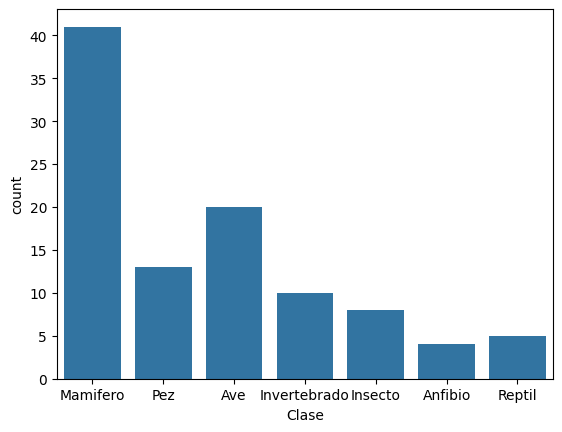

[[ 1.16139451 -0.49690399 -1.18522652 ... -1.69841555 -0.38435306
   1.13818037]
 [ 1.16139451 -0.49690399 -1.18522652 ...  0.58878406 -0.38435306
   1.13818037]
 [-0.86103386 -0.49690399  0.84372057 ...  0.58878406 -0.38435306
  -0.87859537]
 ...
 [ 1.16139451 -0.49690399 -1.18522652 ...  0.58878406 -0.38435306
   1.13818037]
 [-0.86103386 -0.49690399  0.84372057 ... -1.69841555 -0.38435306
  -0.87859537]
 [-0.86103386  2.01246118  0.84372057 ...  0.58878406 -0.38435306
  -0.87859537]]
Resultado reconocer Mamifero
100.0
[ 0.59998616 -0.44645538  0.22253165  0.48485744 -0.20858079  0.01914414
  0.07213884 -0.08583967  0.10563747  0.38511731 -0.13649707  0.16495575
 -0.11561428  0.01010488 -0.06300822 -0.12399669]
--------------------------------------------
[[ 1.16139451 -0.49690399 -1.18522652 ... -1.69841555 -0.38435306
   1.13818037]
 [ 1.16139451 -0.49690399 -1.18522652 ...  0.58878406 -0.38435306
   1.13818037]
 [-0.86103386 -0.49690399  0.84372057 ...  0.58878406 -0.38435306
  -0

'\nResultado reconocer Reptil (Raro)\n100.0\n\nlos w\n\n[ 0.22883532  0.02659989 -0.1609549   0.38913329  0.00388135 -0.35782408\n  0.01030167  0.05723688  0.31430588  0.13100126 -0.24698663  0.51228539\n  0.25131859 -0.26515487 -0.12459915  0.35313164]\n\n\n\n\n'

In [ ]:
"""
Ejercicio 6
El archivo Zoo.csv contiene información de 101 animales caracterizados por los siguientes atributos
A1. Nombre del animal
A2. Tiene Pelo
A3. Plumas
A4. Huevos
A5. Leche
A6. Vuela
A7. Acuático
A8. Depredador
A9. Dentado
A10. Vertebrado
A11. Branquias
A12. Venenoso
A13. Aletas
A14. Patas
A15. Cola
A16. Domestico
A17. Tamaño gato
A18. Clase

Salvo los atributos A1 y A18 que contienen texto y el A14 que contiene el número de patas del animal, el
resto toma el valor 1 si el animal posee la característica y 0 si no. Hay 7 valores de clase posible (atributo
A18): mamífero, ave, pez, invertebrado, insecto, reptil y anfibio.
a) Realice un gráfico que visualice de la cantidad de ejemplos por cada valor del atributo clase y analice
que tipos de problema podrían surgir al entrenar un modelo para clasificación.
b) Utilice todos los ejemplos para entrenar un perceptrón que sea capaz de reconocer si un animal es un
mamífero. Entrene varias veces si es necesario y verifique que funcione correctamente.
c) Observe los pesos del perceptrón entrenado en a) ¿Puede determinar cuáles son las características más
relevantes para decidir si se trata de un mamífero o no? Realice varias ejecuciones independientes y
observe si las características más relevantes siguen siendo las mismas.
d) Repita b) y c) para las aves.
e) Repita b) y c) para los reptiles.
"""




from google.colab import drive
drive.mount('/content/drive')

# Declaración de directorios
FUENTES_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Fuentes'
DATOS_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Datos'

# Agrega ruta de búsqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

# Importaciones necesarias
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pylab as plt
from sklearn import model_selection, preprocessing
from ClassPerceptron import Perceptron

df = pd.read_csv(DATOS_DIR + "/zoo.csv",encoding='latin1')


sns.countplot(x="Clase", data=df)
plt.show()

mapeo = {
   "Clase":{'Mamifero':1, 'Pez':0, 'Ave':0, 'Invertebrado':0, 'Insecto':0, 'Anfibio':0, 'Reptil':0}
        }

df.replace(mapeo, inplace=True)

X = np.array(df.iloc[:,1 :-1])
T = np.array(df['Clase'])#array con ultima columna



#Normalizo Media-Desvio
normalizador= preprocessing.StandardScaler() #media y desvío
X = normalizador.fit_transform(X)
print(X)

#Evaluo
ppn = Perceptron(alpha=0.05, n_iter=20000, random_state=None)
ppn.fit(X, T)


#Verifico


Y= ppn.predict(X)
prediccion= metrics.accuracy_score(Y,T)
print("Resultado reconocer Mamifero")
print(prediccion*100)


print(ppn.w_)
"""
parte a

El problema que podria aparecer es que reconozca mamiferos, y lo otro de lo pase medio por el or...

parte b

Resultado reconocer Mamifero
100.0


parte c

Los w
[ 0.24817954 -0.39956807 -0.49077734  0.52061807 -0.17527422 -0.15456001
  0.24145534 -0.21375104  0.31219368  0.25367036 -0.2943528   0.12582698
 -0.09541252  0.02477387 -0.07799707  0.11034909]

[ 0.50485604  0.04230692 -0.05130123  0.76331015 -0.05248678  0.20431101
 -0.01940424  0.46763458 -0.26899263  0.10427319 -0.29643469 -0.18938866
 -0.24583969  0.21560933 -0.2179546   0.094546  ]

  [ 0.29161586  0.06405594 -0.41430702  0.31382253  0.2225396  -0.00524225
  0.24987944  0.39560697 -0.17301253  0.54082164 -0.38529593  0.18351505
 -0.10274551  0.11259506  0.09367228  0.29224311]


Se aprecia que si tiene pelo, leche o dentado indica mas fuertemente que es mamifero
"""

#Ejercico e (d skip)
print("--------------------------------------------")

mapeo = {
   "Clase":{'Mamifero':0, 'Pez':0, 'Ave':0, 'Invertebrado':0, 'Insecto':0, 'Anfibio':0, 'Reptil':1}
        }

df.replace(mapeo, inplace=True)

X = np.array(df.iloc[:,1 :-1])
T = np.array(df['Clase'])#array con ultima columna



#Normalizo Media-Desvio
normalizador= preprocessing.StandardScaler() #media y desvío
X = normalizador.fit_transform(X)
print(X)

#Evaluo
ppn = Perceptron(alpha=0.05, n_iter=20000, random_state=None)
ppn.fit(X, T)


#Verifico


Y= ppn.predict(X)
prediccion= metrics.accuracy_score(Y,T)
print("Resultado reconocer Reptil")
print(prediccion*100)


print(ppn.w_)



"""
Resultado reconocer Reptil (Raro)
100.0

los w

[ 0.22883532  0.02659989 -0.1609549   0.38913329  0.00388135 -0.35782408
  0.01030167  0.05723688  0.31430588  0.13100126 -0.24698663  0.51228539
  0.25131859 -0.26515487 -0.12459915  0.35313164]

[ 0.69870961  0.24468722 -0.14298327  0.10961455 -0.31424413 -0.17613046
  0.16674903  0.30998112 -0.05925214  0.51906847 -0.22587046  0.52573073
  0.31292634  0.19383426  0.149916    0.09313669]


  Se deja a criterio del lector verificar caracteristicas


"""

In [108]:
"""
Ejercicio 7
El archivo automobile-simple.csv contiene 11 atributos de automóviles de un total de 205 registros. Es una
versión modificada y simplificada del dataset disponible en el repositorio UCI
https://archive.ics.uci.edu/ml/datasets/Automobile. La siguiente tabla contiene una breve descripción de los
atributos que contiene el archivo y caracterizan a cada vehículo.

Atributo Descripción
make Marca: alfa-romero, audi, bmw, chevrolet…
fuel-type Tipo de combustible: diesel, gasolina.
num-of-doors Número de puertas: cuatro, dos.
body-style Tipo de carrocería: techo duro, wagon, sedán, hatchback, descapotable.
curb-weight Peso en vacío: numérico de 1488 a 4066.
engine-size Tamaño del motor: numérico de 61 a 326.
horsepower Potencia: numérico de 48 a 288.
city-mpg Rendimiento en ciudad (en millas por galón): numérico de 13 a 49.
highway-mpg Rendimiento en ruta (en millas por galón): numérico de 16 a 54.
price Precio en USD: numérico de 5118 a 45400.
volume Volumen del vehículo (alto x ancho x alto).
eco-rating Evaluación de la sostenibilidad ambiental del vehículo basado en su volumen, peso,
consumo de combustible y tipo de combustible utilizado.




a) Para cada atributo indique si es Discreto, Continuo, Nominal u Ordinal.
b) Elimine los registros que presenten valores faltantes.
c) Calcule la matriz de correlación usando los atributos numéricos.
d) Realice el entrenamiento de un perceptrón para que aprenda a clasificar si un auto es ecológico. Tenga
en cuenta los siguientes pasos:
I. Utilice el atributo eco-rating para generar un nuevo atributo binario que determine si un auto es
ecológico o no. Un auto es considerado ecológico si el valor de eco-rating supera la media de
dicho atributo.
II. Genere y compare 3 modelos utilizando diferentes normalizaciones (Sin normalizar,
normalización lineal, normalización estándar.
III. Teniendo en cuenta la matriz de correlación del punto c) repita el punto II) eliminando dos
atributos fuertemente correlacionados (uno negativo y otro positivo). Compare y reflexione
sobre los resultados obtenidos.

"""



from google.colab import drive
drive.mount('/content/drive')

# Declaración de directorios
FUENTES_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Fuentes'
DATOS_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Datos'

# Agrega ruta de búsqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

# Importaciones necesarias
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pylab as plt
from sklearn import model_selection, preprocessing
from ClassPerceptron import Perceptron

df = pd.read_csv(DATOS_DIR + "/AUTO.csv",encoding='latin1')

#print(df.head(1))
#print(df.dtypes)
print(df.info())


#Parte b

df = df.dropna()
print(df.info())


#Parte c
"""
La matriz de correlación mide la relación lineal entre dos variables.
Esta medida se calcula utilizando las desviaciones estándar y las medias de las variables, por lo que no se ve afectada por la escala de las variables.
Es por esto que no es neceario tener los atributos normalizados para realizar esto
"""
df["num-of-doors"].unique() #Se fija el numero de puertas (2 o 4)

mapeo = { "num-of-doors":{"two":1, "four":0}}
df.replace(mapeo,inplace=True)


#Agarra los datos numericos (Tods salvo los primeros 4 y el ultimo)
datos_num = df.iloc[:, 4:]
datos_num["two-doors"]=df["num-of-doors"]

ultima_columna = datos_num.columns[-1]
datos_num = datos_num[[ultima_columna] + list(datos_num.columns[:-1])]

print("------------------------------------------------------")
print(datos_num.corr())
"""


X = np.array(df.iloc[:,1 :-1])
T = np.array(df['Clase'])#array con ultima columna



#Normalizo Media-Desvio
normalizador= preprocessing.StandardScaler() #media y desvío
X = normalizador.fit_transform(X)
print(X)

#Evaluo
ppn = Perceptron(alpha=0.05, n_iter=20000, random_state=None)
ppn.fit(X, T)


#Verifico


Y= ppn.predict(X)
prediccion= metrics.accuracy_score(Y,T)
print("Resultado reconocer Mamifero")
print(prediccion*100)


print(ppn.w_)"""


"""

Parte a)

       make fuel-type num-of-doors   body-style  curb-weight  engine-size  \ horsepower  city-mpg  highway-mpg    price      volume  eco-rating
 alfa-romero       gas          two  convertible         2548          130      111.0        21           27  13495.0  528019.904   33.297462

 make             object   Nominal
fuel-type        object    Nominal
num-of-doors     object    Discreto (O ordinal?)
body-style       object    Nominal
curb-weight       int64    Discreto
engine-size       int64    Discreto
horsepower      float64    Continuo
city-mpg          int64    Discreto
highway-mpg       int64    Discreto
price           float64    Continuo
volume          float64    Continuo
eco-rating      float64    Continuo



Parte c)

	two-doors	curb-weight	engine-size	horsepower	city-mpg	highway-mpg	price	volume	eco-rating
two-doors	1.000000	-0.213501	-0.028087	0.099274	0.035202	0.053354	-0.046571	-0.477374	0.034539
curb-weight	-0.213501	1.000000	0.848932	0.759925	-0.755559	-0.800113	0.834732	0.822823	-0.842957
engine-size	-0.028087	0.848932	1.000000	0.825286	-0.655737	-0.684662	0.873708	0.592571	-0.723965
horsepower	0.099274	0.759925	0.825286	1.000000	-0.821960	-0.803658	0.811953	0.449278	-0.839619
city-mpg	0.035202	-0.755559	-0.655737	-0.821960	1.000000	0.972407	-0.692948	-0.554978	0.976650
highway-mpg	0.053354	-0.800113	-0.684662	-0.803658	0.972407	1.000000	-0.708659	-0.608072	0.984258
price	-0.046571	0.834732	0.873708	0.811953	-0.692948	-0.708659	1.000000	0.631578	-0.747982
volume	-0.477374	0.822823	0.592571	0.449278	-0.554978	-0.608072	0.631578	1.000000	-0.598520
eco-rating	0.034539	-0.842957	-0.723965	-0.839619	0.976650	0.984258	-0.747982	-0.598520	1.000000

"""


#Parte d

#Elimina columnas
if False:
    datos_num = datos_num.drop(columns=['highway-mpg'])
    datos_num = datos_num.drop(columns=['curb-weight'])
datos_num.head()


#Agrega los datos con la caracteristica ecoFriendly
media = datos_num["eco-rating"].mean()
X = np.array(datos_num.iloc[:,1:-1])
T = np.array((datos_num['eco-rating'] > media) * 1)

print(len(X))
print(len(T))
print(T)


#Corta el archivo en 2, para testearlo despues
X_train, X_test, T_train, T_test = model_selection.train_test_split(
        X, T, test_size=0.30, random_state=42)


#Norm aliza
if True:
    normalizador= preprocessing.MinMaxScaler()
    #normalizador= preprocessing.StandardScaler() #media y desvío
    X_train = normalizador.fit_transform(X_train)
    X_test  = normalizador.transform(X_test)

print(X_test)


#Entrena
ppn = Perceptron(alpha=0.0001, n_iter=500, random_state=None) #random_state=None significa que no utiliza una semilla para la generación de números aleatorios
ppn.fit(X_train, T_train)


#Dibuja
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='*')
plt.title('Datos de entrenamiento')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()



#Predice
Y_test = 0 * len(X_test) #necesario inicializar el array en 0?
Y_test = ppn.predict(X_test)
nAciertos = np.sum(Y_test == T_test)
print("Dimensiones de Y_test:", Y_test.shape)
print("Dimensiones de T_test:", T_test.shape)
print("cantidad de tests: ", X_test.shape[0])
print("aciertos: ", nAciertos)
print("%% de aciertos = %.2f %%" % (100 * nAciertos / X_test.shape[0]))




"""
Resultados: (de 5 medidas)

con todas las columnas
sin normalizar: 57%
con MinMaxScaler: entre 80 y 97%
con StandardScaler: entre 92 y 95%

sacando dos columnas con alta correlación
sin normalizar: 57%
con MinMaxScaler: entre 73 y 92%
con StandardScaler: entre 91 y 95%

Conclusión:
El trabajar con las columnas con mayor correlación nos da una mejor precisión en nuestro modelo.
De todas formas ya habían varias columnas con alta correlación respecto del atributo a predecir,
por lo cual no fue tan influyente el hecho de no operar con ellas

"""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          205 non-null    object 
 1   fuel-type     205 non-null    object 
 2   num-of-doors  203 non-null    object 
 3   body-style    205 non-null    object 
 4   curb-weight   205 non-null    int64  
 5   engine-size   205 non-null    int64  
 6   horsepower    203 non-null    float64
 7   city-mpg      205 non-null    int64  
 8   highway-mpg   205 non-null    int64  
 9   price         201 non-null    float64
 10  volume        205 non-null    float64
 11  eco-rating    205 non-null    float64
dtypes: float64(4), int64(4), object(4)
memory usage: 19.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 204
Data columns (total 12 column

'\n\nParte a)\n\n       make fuel-type num-of-doors   body-style  curb-weight  engine-size  \\ horsepower  city-mpg  highway-mpg    price      volume  eco-rating\n alfa-romero       gas          two  convertible         2548          130      111.0        21           27  13495.0  528019.904   33.297462\n\n make             object   Nominal\nfuel-type        object    Nominal\nnum-of-doors     object    Discreto (O ordinal?)\nbody-style       object    Nominal\ncurb-weight       int64    Discreto\nengine-size       int64    Discreto\nhorsepower      float64    Continuo\ncity-mpg          int64    Discreto\nhighway-mpg       int64    Discreto\nprice           float64    Continuo\nvolume          float64    Continuo\neco-rating      float64    Continuo\n\n\n\n\n\n'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    Id       Edad   Prescripcion Astigmatismo  Lagrimas     Diagnostico
10  11  pre_presb         Miopía           NO    Normal  Lentes_Blandos
11  12  pre_presb  Hipermetropía           SI  Reducida  No_usar_Lentes
21  22  Presbicia         Miopía           NO  Reducida  No_usar_Lentes
1    2      Joven         Miopía           NO    Normal  Lentes_Blandos
6    7      Joven         Miopía           NO  Reducida  No_usar_Lentes
20  21  Presbicia  Hipermetropía           SI    Normal  No_usar_Lentes
3    4      Joven         Miopía           SI    Normal    Lentes_Duros
9   10  pre_presb         Miopía           SI    Normal    Lentes_Duros
13  14  pre_presb  Hipermetropía           SI    Normal  No_usar_Lentes
15  16  pre_presb         Miopía           SI  Reducida  No_usar_Lentes
[1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0]
[[-1.66132477 -1.22474487 -1.

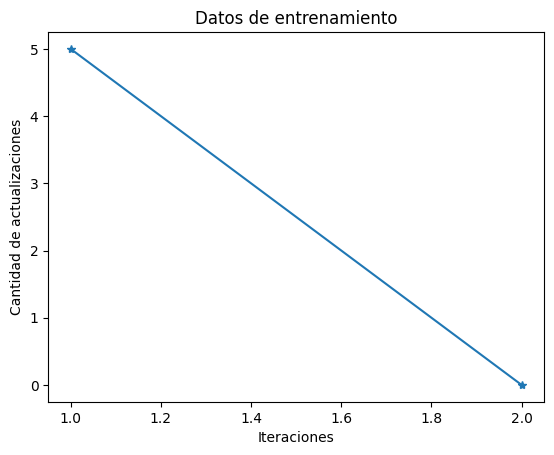

100.0


In [ ]:
"""
Ejercicio Extra
En el siguiente link encontrará un conjunto de datos conformado por 24 diagnósticos de uso de lentes de contactos: http://archive.ics.uci.edu/ml/datasets/Lenses. Los atributos son:
ID : nro. de registro (valor correlativo entre 1 y 24)
Edad del paciente: 1= joven; 2 = pre-presbicia; 3 = presbicia (o vista cansada)
Expectativa de prescripción: 1=miopía; 2=hipermetropía
Astigmatismo : 1= no; 2= si
Producción de lágrimas: 1=reducida; 2=normal
Diagnóstico:
el paciente debería utilizar lentes de contacto duros.
el paciente debería utilizar lentes de contacto blandos.
el paciente no debería utilizar lentes de contacto.
Indique si es posible entrenar, utilizando los 24 ejemplos, un perceptrón capaz de separar los casos que deben utilizar lentes blandos (Diagnóstico=2) del resto.

Pregunta 15Respuesta
Verdadero Si
Falso

"""


from google.colab import drive
drive.mount('/content/drive')

# Declaración de directorios
FUENTES_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Fuentes'
DATOS_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Datos'

# Agrega ruta de búsqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

# Importaciones necesarias
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
from sklearn import model_selection, preprocessing
from ClassPerceptron import Perceptron
from sklearn import model_selection, preprocessing, metrics




datos = pd.read_csv(DATOS_DIR + "/Lentes.csv", encoding='latin1')
print(datos.sample(10))



mapeo = {
    "Edad":{'Joven':1, 'pre_presb':2, 'Presbicia':3},
    "Prescripcion":{'Hipermetropía':0, 'Miopía':1},
    "Astigmatismo":{"SI":1, "NO":0},
    "Lagrimas":{"Normal":1, "Reducida":0},
    "Diagnostico":{'Lentes_Blandos':1, 'Lentes_Duros':0, 'No_usar_Lentes':0}
}
datos.replace(mapeo, inplace=True)
datos.head(10)




X = np.array(datos.iloc[:,:-1])
T = np.array(datos['Diagnostico'])
print(T)





normalizador= preprocessing.StandardScaler() #media y desvío
X = normalizador.fit_transform(X)
print(X)




ppn = Perceptron(alpha=0.05, n_iter=200, random_state=None) #random_state=None significa que no utiliza una semilla para la generación de números aleatorios
ppn.fit(X, T)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='*')
plt.title('Datos de entrenamiento')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()



Y= ppn.predict(X)
prediccion= metrics.accuracy_score(Y,T)
print(prediccion*100)